In [975]:
import noisereduce as nr
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise \
import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import speech_recognition as sr
from scipy.io.wavfile import write
import numpy as np
import io

In [976]:
#data, rate = sf.read(r"C:\Users\serha\Desktop\Recording (2).wav")
#data, rate = sf.read(io.StringIO(r"C:\Users\serha\Desktop\Recording (2).wav"))
r = sr.Recognizer()
rate, data = wavfile.read('C:/Users/serha/Desktop/Recording (9).wav')
data = data[:, 1]
print(rate)
url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/fish.wav"
response = urllib.request.urlopen(url)
dataege = sf.read(io.BytesIO(response.read()))

48000
(array([0., 0., 0., ..., 0., 0., 0.]), 44100)


In [977]:
IPython.display.Audio(data=data, rate=rate)

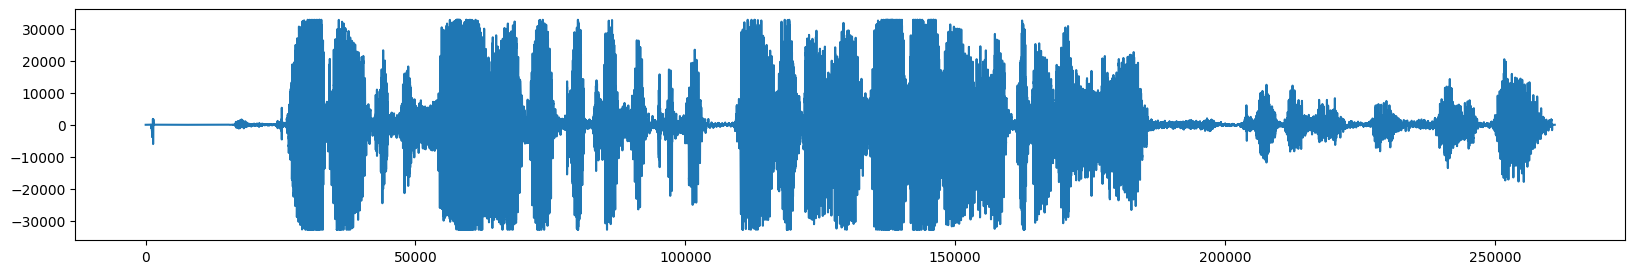

In [978]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

In [979]:
noise_len = 2 # seconds
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
print(rate)
print(noise)
noise_clip = noise[rate*noise_len]
noise_clip
print(noise_clip)
print(data)
audio_clip_band_limited = data

48000
[ 0.02076061  0.00171933 -0.01150112 ... -0.00525725  0.0086839
  0.0251272 ]
-0.004011122848818178
[ 0  0  0 ...  0 -1 -1]


In [980]:
reduced_noise = nr.reduce_noise(y = audio_clip_band_limited, sr=rate, n_std_thresh_stationary=2, stationary=True)

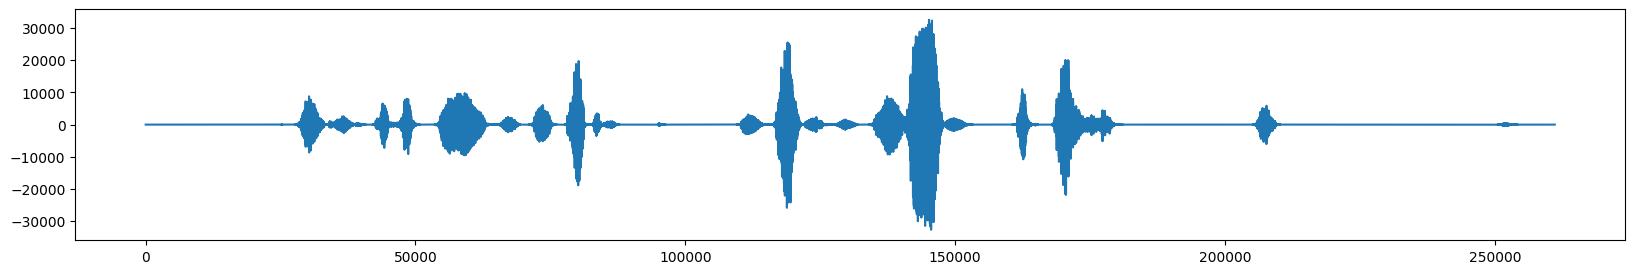

In [981]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [982]:
IPython.display.Audio(data=reduced_noise, rate=rate)

In [983]:
reduced_noise = nr.reduce_noise(y = audio_clip_band_limited, sr=rate, thresh_n_mult_nonstationary=2,stationary=False)

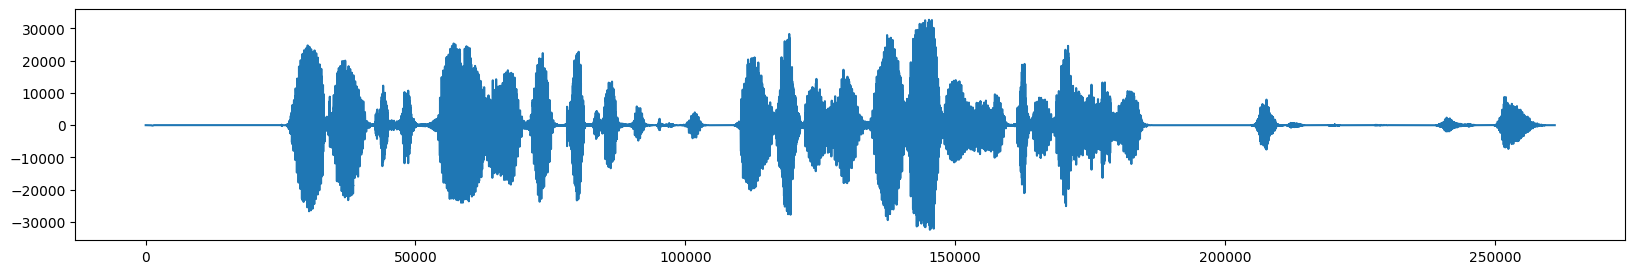

In [984]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)
IPython.display.Audio(data= reduced_noise, rate = rate)

In [991]:
reduced_noise = nr.reduce_noise(y = audio_clip_cafe, sr=rate, thresh_n_mult_nonstationary=3,stationary=False)

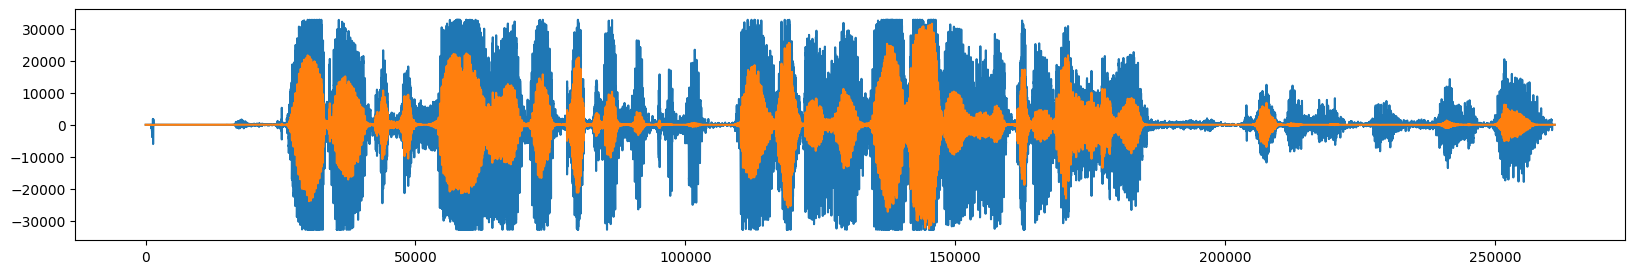

In [992]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_cafe)
ax.plot(reduced_noise, alpha = 1)
IPython.display.Audio(data=reduced_noise, rate=rate)

In [993]:
IPython.display.Audio(data=reduced_noise, rate=rate)

In [996]:
noise_reduced = nr.reduce_noise(y=data, sr=rate, prop_decrease=0, stationary=False)

In [998]:
long_data = np.tile(data, 10)
len(long_data)/rate

54.4

In [1000]:
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(long_data), samplerate=rate)*10
audio_clip_band_limited = long_data+noise

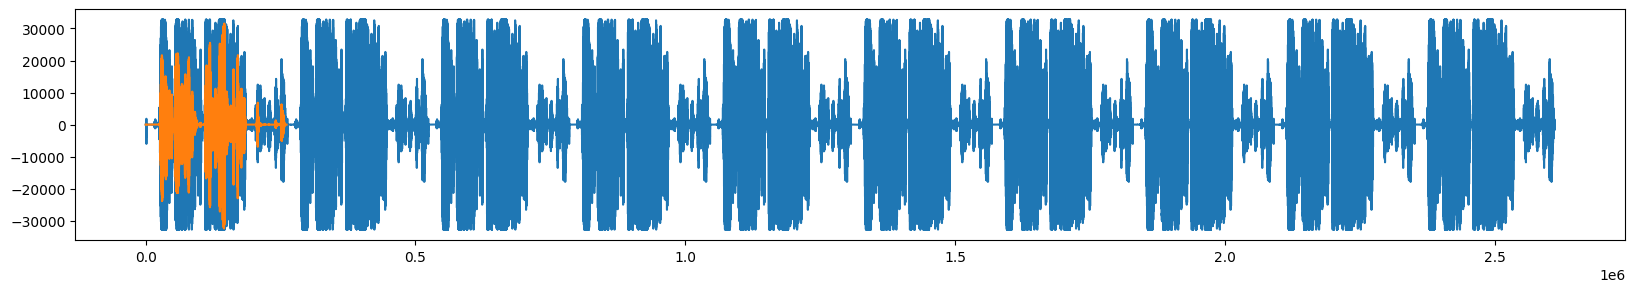

In [1003]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)
ax.plot(reduced_noise)

In [1004]:
from noisereduce.noisereduce import SpectralGateStationary

In [1005]:
sg = SpectralGateStationary(
    y = data,
    sr = rate,
    y_noise=None,
    prop_decrease=1.0,
    time_constant_s=2.0,
    freq_mask_smooth_hz=500,
    time_mask_smooth_ms=50,
    n_std_thresh_stationary=1.5,
    tmp_folder=None,
    chunk_size=600000,
    padding=30000,
    n_fft=1024,
    win_length=None,
    hop_length=None,
    clip_noise_stationary=True,
    use_tqdm=False,
    n_jobs=1,
)